# t-tests in R 

In [34]:
library('ggplot2')
library('reshape2')

In [1]:
df = read.csv('weights_ttests.csv')

In [2]:
head(df)

,id,sex,start_weight,end_weight
,<int>,<chr>,<int>,<int>
1,1,Male,203,205
2,2,Male,180,177
3,3,Male,222,218
4,4,Male,190,190
5,5,Male,201,199
6,6,Male,185,183


In [4]:
t.test(df$start_weight, mu=200)


	One Sample t-test

data:  df$start_weight
t = -4.2559, df = 29, p-value = 0.0001989
alternative hypothesis: true mean is not equal to 200
95 percent confidence interval:
 172.0667 190.2000
sample estimates:
mean of x 
 181.1333 


In [5]:
# Since our p-value is less than .05, we determine that start weight differs from 200

In [6]:
t.test(df$end_weight, mu=200)


	One Sample t-test

data:  df$end_weight
t = -4.6184, df = 29, p-value = 7.317e-05
alternative hypothesis: true mean is not equal to 200
95 percent confidence interval:
 170.9027 188.7640
sample estimates:
mean of x 
 179.8333 


In [7]:
# Since our p-value is less than .05, we determine that end weight differs from 200

## Independent Sample t-test

Compares two indepedent samples

Here, we will compare male and female start weight and end weight

In [13]:
male_data <- subset(df, sex == 'Male', select = c('start_weight'))
female_data <- subset(df, sex == 'Female', select = c('start_weight'))

In [14]:
t.test(male_data, female_data, paired = FALSE)


	Welch Two Sample t-test

data:  male_data and female_data
t = 2.1352, df = 27.897, p-value = 0.04166
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  0.7236681 35.0096652
sample estimates:
mean of x mean of y 
 190.0667  172.2000 


In [15]:
# Since our p value is less than .05, we can conclude that there is a difference
# Next let's plot the means to see the direction

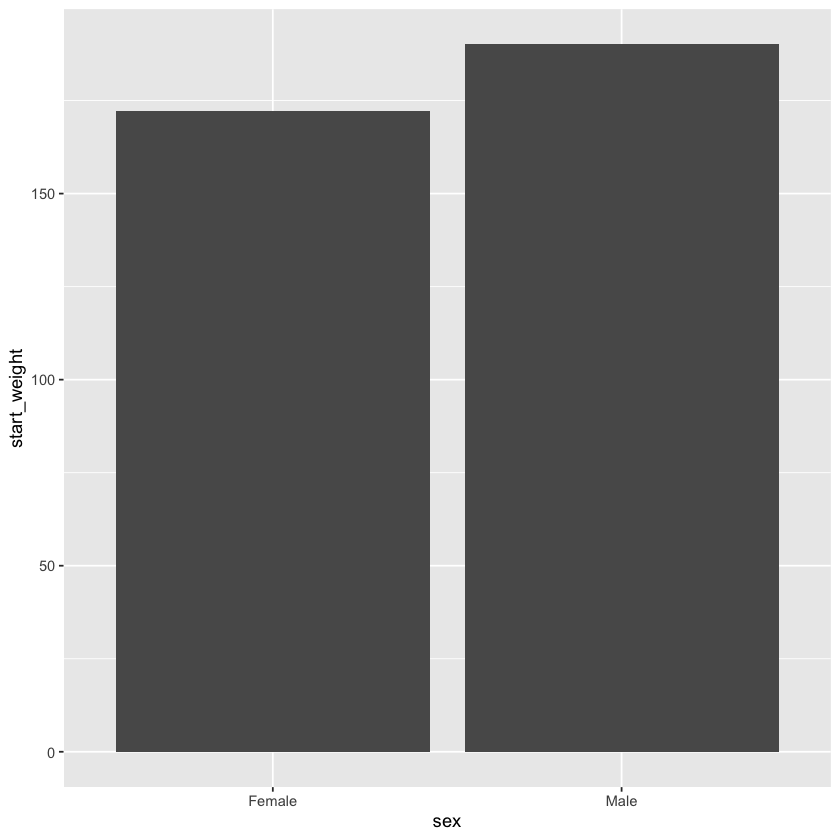

In [41]:
ggplot(df, aes(sex,start_weight)) +
 geom_bar(stat = "summary", position = "dodge", fun = mean)

In [22]:
# We can see that males weight more at start

In [25]:
# Compare end weights for males and females
male_data <- subset(df, sex == 'Male', select = c('end_weight'))
female_data <- subset(df, sex == 'Female', select = c('end_weight'))
t.test(male_data, female_data, paired = FALSE)


	Welch Two Sample t-test

data:  male_data and female_data
t = 1.9597, df = 27.91, p-value = 0.06008
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7415415 33.4082081
sample estimates:
mean of x mean of y 
 188.0000  171.6667 


In [24]:
# Since our p-value is above .05, we conclude there is not a sig diff in end weights

## Paired Sample t-test

When data is paired, such as start and end weights for an individual, we run a paired samples t-test.

Here, the question is: Do start and end weights differ?

In [27]:
t.test(df$start_weight, df$end_weight, paired = TRUE)


	Paired t-test

data:  df$start_weight and df$end_weight
t = 2.5378, df = 29, p-value = 0.01679
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.2523037 2.3476963
sample estimates:
mean of the differences 
                    1.3 


In [28]:
# Since our p value is less than .05, we can conclude that there is a difference
# Next, lets plot the data to visualize the difference

In [32]:
mean(df$start_weight)
mean(df$end_weight)

[1] 181.1333

[1] 179.8333

In [37]:
long_form_data = melt(df, id.vars = c("id", "sex"))

In [38]:
long_form_data

id,sex,variable,value
<int>,<chr>,<fct>,<int>
1,Male,start_weight,203
2,Male,start_weight,180
3,Male,start_weight,222
4,Male,start_weight,190
5,Male,start_weight,201
6,Male,start_weight,185
7,Male,start_weight,150
8,Male,start_weight,193
9,Male,start_weight,209


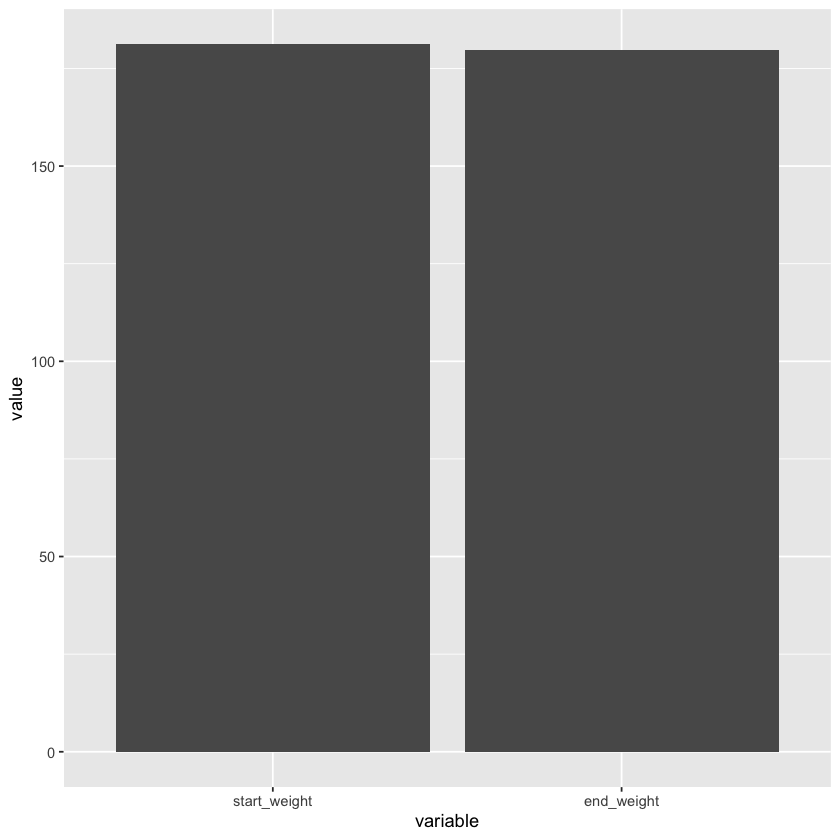

In [40]:
ggplot(long_form_data, aes(variable,value)) +
 geom_bar(stat = "summary", position = "dodge", fun = mean)

In [42]:
# Although it is hard to see in the plot, end weights were on average lower than start weights